Copyright **`(c)`** 2022 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [1]:
NUM_FRIENDS_D = 6
NUM_FRIENDS_C = 5
NUM_BIKE = 2

In [2]:
from gx_utils import *

In [3]:
from itertools import product, combinations
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [4]:

assert NUM_FRIENDS_C<=NUM_FRIENDS_D, "There are more computer engeneer than data scientist, solution not exist!"
assert NUM_BIKE>0, "Bikes has no seats, solution not exist!"

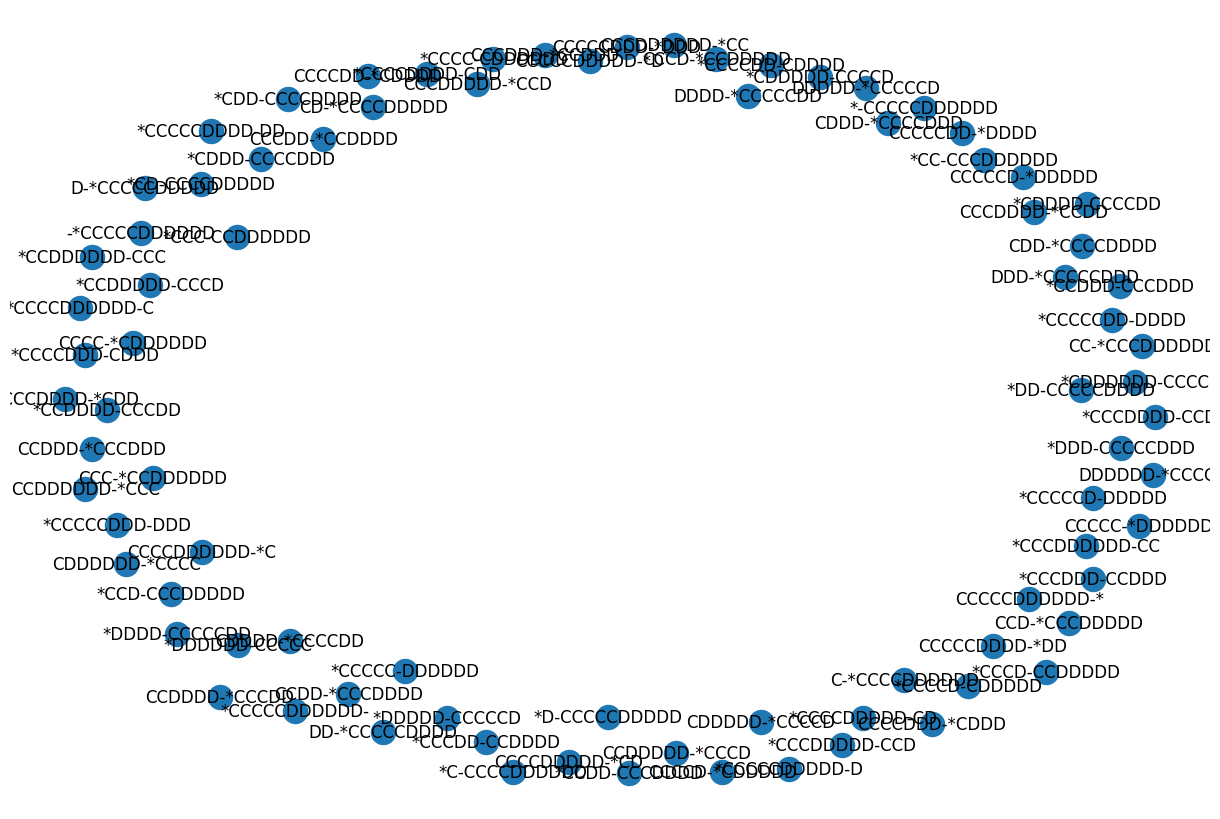

In [5]:
def node2sets(node):
    pizzeria, pub = node.split("-")
    return Multiset(pizzeria), Multiset(pub)


def sets2node(pizzeria, pub):
    return "".join(pizzeria) + "-" + "".join(pub)


sspace = nx.Graph()
for c, d, b in product(range(NUM_FRIENDS_C+1), range(NUM_FRIENDS_D+1), [True, False]):
    pizzeria = ("*" if b else "") + "C" * c + "D" * d
    pub = ("*" if not b else "") + "C" * (NUM_FRIENDS_C - c) + "D" * (NUM_FRIENDS_D - d)
    sspace.add_node(pizzeria + "-" + pub)
SOURCE = "*" + "C" * (NUM_FRIENDS_C) + "D" * (NUM_FRIENDS_D) + "-"
DESTINATION = "-*" + "C" * (NUM_FRIENDS_C) + "D" * (NUM_FRIENDS_D)

plt.figure(figsize=(12, 8))
nx.draw(sspace, with_labels=True)



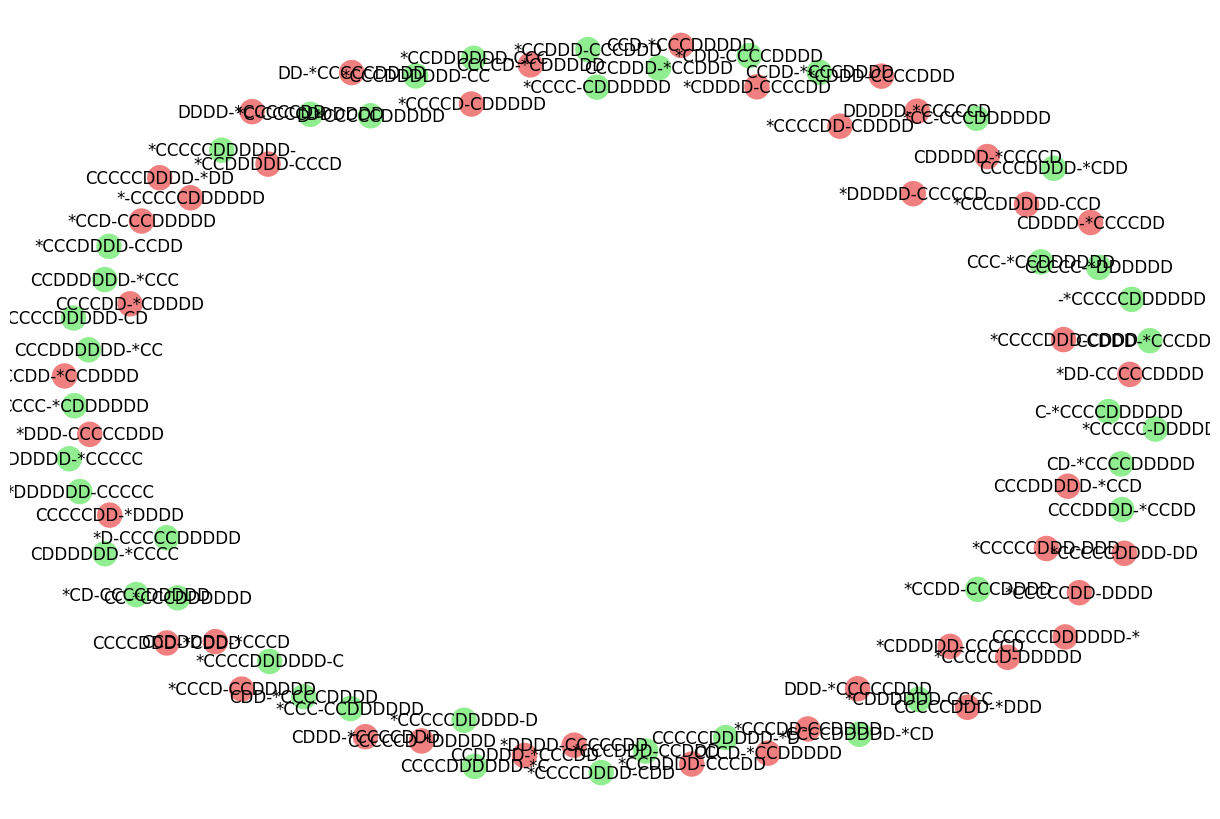

In [6]:
def valid_node(node):
    pizzeria, pub = node2sets(node)
    return valid_location(pizzeria) and valid_location(pub)


def valid_location(loc):
    if loc.count("*") == 1 and len(loc) == 1:
        return False
    if 0 < loc.count("D") < loc.count("C"):
        return False
    return True


plt.figure(figsize=(12, 8))
nx.draw(
    sspace,
    with_labels=True,
    node_color=["lightgreen" if valid_node(n) else "lightcoral" for n in sspace],
)

C:\Users\utente\AppData\Local\Temp\ipykernel_3508\2057113746.py:35: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw(valid_sspace, pos=graphviz_layout(valid_sspace, prog="neato"), with_labels=True, node_color=node_color)


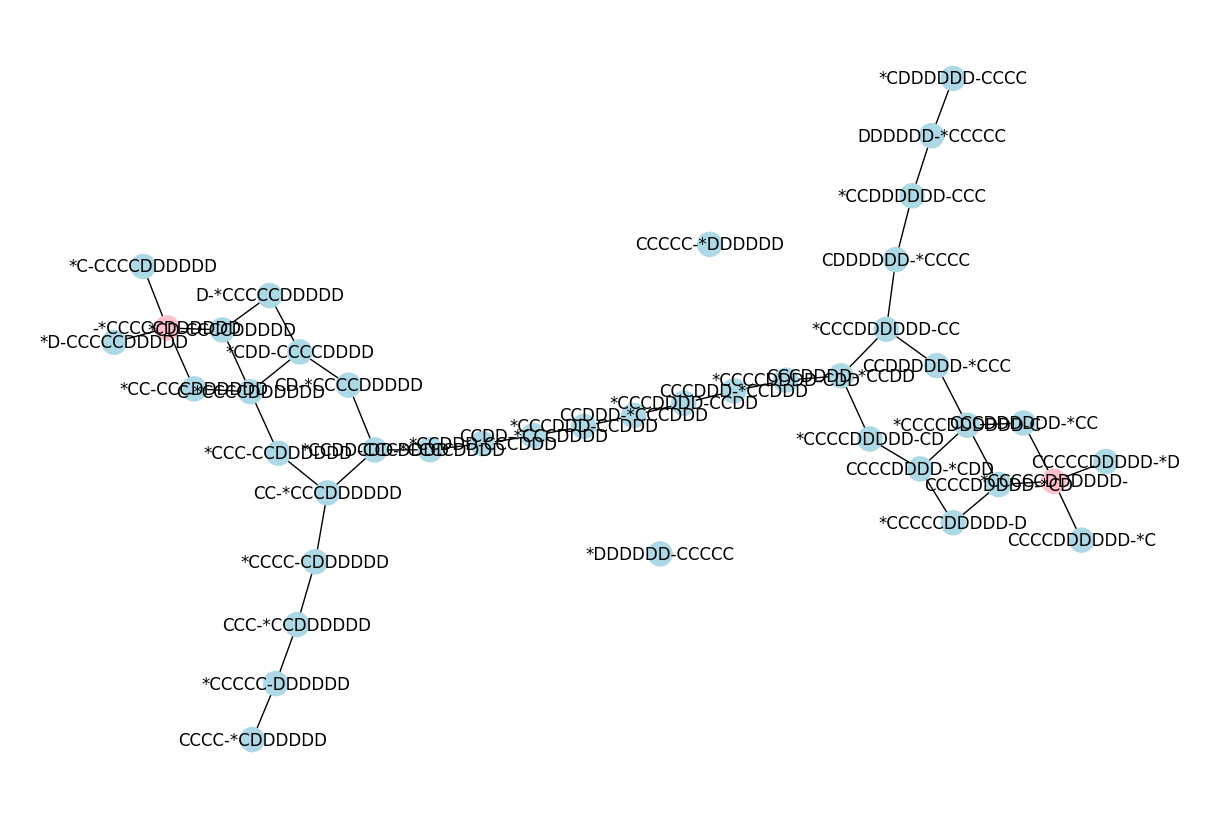

In [7]:
def compute_bike():
    bike_combinations = []
    for c, d in product(range(NUM_FRIENDS_C+1), range(NUM_FRIENDS_D+1)):
        bike_str = "*"+"C" * c + "D" * d
        if (c or d) and len(bike_str)<=NUM_BIKE+1:
            if bike_str.count("D")>0 and bike_str.count("C")>0:
                if bike_str.count("C")<= bike_str.count("D"):
                  bike_combinations.append(bike_str)   
            else:
                bike_combinations.append(bike_str)             
    return bike_combinations


def bike(from_, to):
    possible = list()
    bike_list = compute_bike()
    for b in bike_list:
        bike = Multiset(b)
        if bike <= from_:
            possible.append(sets2node(from_ - bike, to + bike))
    return possible


valid_sspace = nx.Graph()

for node in sspace.nodes:
    if valid_node(node):
        valid_sspace.add_node(node)

for n1, n2 in [(a, b) for a in valid_sspace.nodes for b in bike(*node2sets(a)) if valid_node(b)]:
    valid_sspace.add_edge(n1, n2)

plt.figure(figsize=(12, 8))
node_color = ["pink" if n == SOURCE or n == DESTINATION else "lightblue" for n in valid_sspace]
nx.draw(valid_sspace, pos=graphviz_layout(valid_sspace, prog="neato"), with_labels=True, node_color=node_color)

In [8]:
try:
    print(nx.shortest_path(valid_sspace, SOURCE, DESTINATION))
except nx.NetworkXNoPath:
    print("Solution not found!")


['*CCCCCDDDDDD-', 'CCCCDDDDD-*CD', '*CCCCDDDDDD-C', 'CCCCDDDD-*CDD', '*CCCCDDDDD-CD', 'CCCDDDD-*CCDD', '*CCCCDDDD-CDD', 'CCCDDD-*CCDDD', '*CCCDDDD-CCDD', 'CCDDD-*CCCDDD', '*CCCDDD-CCDDD', 'CCDD-*CCCDDDD', '*CCDDD-CCCDDD', 'CDD-*CCCCDDDD', '*CCDD-CCCDDDD', 'CC-*CCCDDDDDD', '*CCC-CCDDDDDD', 'C-*CCCCDDDDDD', '*CD-CCCCDDDDD', '-*CCCCCDDDDDD']
